# Wstęp do Sztucznej Inteligencji - rok akademicki 2021/2022

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Sztuczne Sieci Neuronowe - Lab 3 - Zadania (obowiązkowe)

# Biblioteka Keras. Aspekty uczenia sieci neuronowych.

## Sieci neuronowe w języku Python
Obecnie za sprawą rozwoju i popularności tzw. głębokich sieci neuronowych (Deep Neural Network) dostępnych jest bardzo dużo bibliotek/frameworków do budowy i uczenia sieci neuronowych (TensorFlow, Theano, Spark MLlib, MXNet, Microsoft Cognitive Toolkit, Caffe itp.). Z wielu z nich można korzystać w prosty sposób przy wykorzystaniu języka  Python.  

## Biblioteka Keras (na TensorFlow)
Biblioteka Keras jest wysokopoziomową nakładką na biblioteki takie jak TensorFlow, CNTK (Microsoft Cognitive Toolkit) lub Theano napisaną w języku Python. Domyślnie wykorzystywanym backendem jest TensorFlow i z takiego będziemy korzystać. Biblioteka ta pozwala na:
- Łatwe i szybkie prototypowanie modeli (pełna modularność).
- Wspiera zarówno "klasyczne" sieci neuronowe jak i konwolucyjne czy rekurencyjne. 
- Umożliwia uczenie przy wykorzystaniu CPU oraz GPU.

Keras: https://keras.io/

TensorFlow: https://www.tensorflow.org/

## Szybkie wprowadzenie na przykładzie sieci dla problemu XOR

### Dane:

In [2]:
import numpy as np
data_x = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])  # backpropagation nie lubi zer, bez biasu
data_y = np.array([0,1,1,0])

### Import biblioteki Tensorflow i Keras
Biblioteke Kreas można zaimportować bezpośrednio `import keras` Jednak obecnie bublioteka Keras jest również dostępna jako podmoduł biblioteki Tensorflow.

In [4]:
import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('Keras z tensorflow version:', tf.keras.__version__)

Tensorflow version: 2.5.0
Keras z tensorflow version: 2.5.0


### Przygotowanie architektury sieci
Stworzenie sieci MLP o dwóch neuronach ukrytych i jednym wyjściowym:

Tworzenie modelu odbywa się na zasadzie budowania modelu z klocków (warstw). Najpierw tworzymy tensor będący warstwą wejściową `Input` a następnie dodajemy do niego kojejne warstwy np. `Dense` (warstwa neuronów typu każdy z każdym). Następnie dysponując tensorem wejściowym i wyjściowym określamy Model. Model można tworzyć też z wykorzystaniem klasy `Sequential`.

In [5]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

In [6]:
x = Input(shape=(2,))  #należy ustawić kształ tensora wejściowego
h = Dense(2, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform')(x)   #parametry patrz dokumentacja
y = Dense(1, use_bias=True, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform')(h)  # parametry patrz dokumentacja
# alternatywnie activation można ustawić na None i dodać funkcje aktywacj jako osobną warstwę
mlp = Model(inputs=x, outputs=y)

In [7]:
mlp.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
m2 = Sequential()
m2.add(Dense(2, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform', input_shape=(2,)))
m2.add(Dense(1, use_bias=True, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform'))

In [9]:
m2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### Kompilacja modelu
Po stworzeniu modelu należy go skompilować, podczas kompilacji podajemy m.in. rodzaj funkcji używanej do liczenia błędu (`loss`) oraz algorytm wykorzystywany do uczenia (`optimizer`). 

In [10]:
rms = tf.keras.optimizers.RMSprop(learning_rate=0.01)  #lr = learning rate; parametry patrz dokumentacja
mlp.compile(loss='mse', optimizer=rms)  #mse = mean squared error

In [11]:
m2.compile(loss='mse', optimizer=rms) 

### Uczenie
Po kompilacji możemy przystąpić do uczenia za pomocą metody `fit`.

In [12]:
print('rozpoczecie uczenia')
#ustaw verbose=0 aby wyłączyć szczegóły 
hist = mlp.fit(data_x, data_y, epochs=300, verbose=1, batch_size=4)  #  parametry patrz dokumentacja
print('koniec uczenia')
# ponowne wykonanie powoduje douczanie a nie uczenie od nowa

rozpoczecie uczenia
Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.2500
Epoch 2/300
1/1 [==============================] - 0s 12ms/step - loss: 0.2500
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 0.2500
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 0.2500
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 0.2500
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 0.2500
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 0.2500
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 0.2500
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 0.2499
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 0.2499
Epoch 11/300
1/1 [==============================] - 0s 5ms/step - loss: 0.2497
Epoch 12/300
1/1 [==============================] - 0s 8ms/step - loss: 0.2493
Epoch 13/300
1/1 [======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0735
Epoch 105/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 106/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0711
Epoch 107/300
1/1 [==============================] - 0s 10ms/step - loss: 0.0699
Epoch 108/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0687
Epoch 109/300
1/1 [==============================] - 0s 8ms/step - loss: 0.0676
Epoch 110/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0664
Epoch 111/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0653
Epoch 112/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0642
Epoch 113/300
1/1 [==============================] - 0s 8ms/step - loss: 0.0631
Epoch 114/300
1/1 [==============================] - 0s 8ms/step - loss: 0.0620
Epoch 115/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 116/300
1/1 [==============================] - 

1/1 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 207/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0125
Epoch 208/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 209/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0121
Epoch 210/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 211/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 212/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 213/300
1/1 [==============================] - 0s 7ms/step - loss: 0.0113
Epoch 214/300
1/1 [==============================] - 0s 8ms/step - loss: 0.0111
Epoch 215/300
1/1 [==============================] - 0s 7ms/step - loss: 0.0109
Epoch 216/300
1/1 [==============================] - 0s 996us/step - loss: 0.0107
Epoch 217/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 218/300
1/1 [==============================] -

Sprawdzenie czego model się nauczył:

In [13]:
pred = mlp.predict(data_x)
print(pred)

[[0.04659379]
 [0.947072  ]
 [0.94496846]
 [0.04663825]]


## Zagadnienie niedouczenia lub przeuczenia sieci
Przykładowy problem aproksymacji funkcji.

### Zwróć uwagę
- W rzeczywistości dane często pochodzą z pomiarów, które obarczone są niepewnością. W poniższym przykładzie modelujemy to poprzez dodanie losowego błędu do wartości funkcji sinus. 

- Funkcja sinus pełni tu rolę rzeczywistego modelu, którego w praktycznych problemach tak naprawdę nie znamy. Próbujemy go odkryć/aproksymować na podstawie dostępnych nam danych. 

- Celem nauki jest osiągnięcie dobrej generalizacji. Tutaj oznacza to, że sieć, na podstawie dostępnych (zaszumionych) przykładów, powinna nauczyć się prawidłowego przebiegu funkcji sinus. 

- Jeśli będziemy uczyć sieć zbyt długo, może pojawić się niekorzystny efekt zwany przeuczeniem. Ma to miejsce gdy sieć po odkryciu głównych zależności/ogólnego przebiegu funkcji, zaczyna dostosowywać się do szumu istniejącego w danych. Można temu przeciwdziałać poprzez odpowiednio wczesne zatrzymanie procesu uczenia. 

### Dane

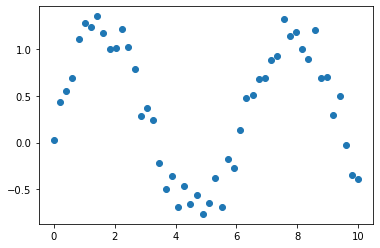

In [14]:
import matplotlib.pyplot as plt
data_x = np.linspace(0, 10, 50)
data_y = np.sin(data_x) + np.random.random(data_x.shape[0])*0.5
fig = plt.figure()
plt.plot(data_x, data_y, 'o')
plt.show()

### Podział na dane uczące i walidacyjne

Dane walidacyjne służą do monitorowania procesu uczenia, sprawdzania jak sieć radzi sobie z danymi, które nie są wykorzystywane do modyfikacji wag.

Jeśli błąd na danych uczących maleje, a na danych walidacyjnych już nie (lub wręcz rośnie), jest to potencjalny sygnał, że sieć jest przeczuczona.

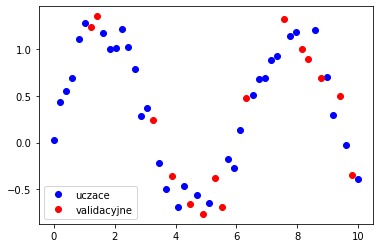

In [15]:
temp = np.arange(50)
np.random.shuffle(temp)
val_x = data_x[temp[35:]]
val_y = data_y[temp[35:]]
data_x = data_x[temp[:35]]
data_y = data_y[temp[:35]]

fig = plt.figure()
plt.plot(data_x, data_y, 'bo', label='uczace')
plt.plot(val_x, val_y, 'ro', label='validacyjne')
plt.legend()
plt.show()

### Model sieci MLP
Mała sieć, 35 neuronów w warstwie ukrytej.

In [16]:
x = Input(shape=(1,))
h = Dense(35, input_dim=1, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform')(x)
y = Dense(1, use_bias=True, activation='linear', kernel_initializer='random_uniform', bias_initializer='random_uniform')(h)
model1 = Model(inputs=x, outputs=y)
rms = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model1.compile(loss='mse', optimizer=rms)
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 35)                70        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 36        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


### Wizualizacja uczenia


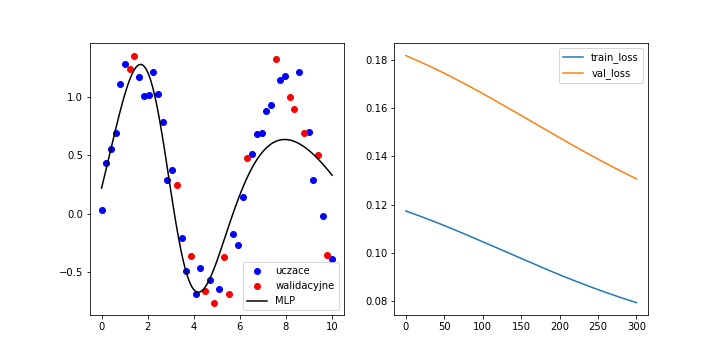

In [18]:
import io
import time
import base64
import IPython

def fig2b64(f):
  data = io.BytesIO()
  f.savefig(data, format='png')
  data.seek(0)
  return base64.b64encode(data.read()).decode()

data_xx = np.linspace(0, 10, 100)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

train_loss = []
val_loss = []

model = model1
n_epochs = 300

hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
train_loss.append(model.evaluate(data_x, data_y, verbose=0))
val_loss.append(model.evaluate(val_x, val_y, verbose=0))
pred = model.predict(data_xx)
ax1.plot(data_x, data_y, 'bo', label='uczace')
ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
ax1.plot(data_xx, pred, 'k-', label='MLP')
ax1.legend()
ax2.plot(train_loss, label='train_loss')
ax2.plot(val_loss, label='val_loss')
ax2.legend()
data_str = fig2b64(fig)
rys = IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)

for i in range(n_epochs):
  IPython.display.clear_output(wait=True)
  #time.sleep(0.2)
  hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
  train_loss.append(model.evaluate(data_x, data_y, verbose=0))
  val_loss.append(model.evaluate(val_x, val_y, verbose=0))
  pred = model.predict(data_xx)
  ax1.clear()
  ax2.clear()
  ax1.plot(data_x, data_y, 'bo', label='uczace')
  ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
  ax1.plot(data_xx, pred, 'k-', label='MLP')
  ax1.legend()
  ax2.plot(train_loss, label='train_loss')
  ax2.plot(val_loss, label='val_loss')
  ax2.legend()
  data_str = fig2b64(fig)
  rys = IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)
plt.close(1)

### Model sieci MLP


Większa sieć, dwie warstwy ukryte odpowiednio 100 i 50 neuronów.

In [ ]:
x = Input(shape=(1,))
h1 = Dense(100, input_dim=1, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform')(x)
h2 = Dense(50, input_dim=1, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform')(h1)
y = Dense(1, use_bias=True, activation='linear', kernel_initializer='random_uniform', bias_initializer='random_uniform')(h2)
model2 = Model(inputs=x, outputs=y)
rms = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model2.compile(loss='mse', optimizer=rms)
model2.summary()

### Wizualizacja uczenia


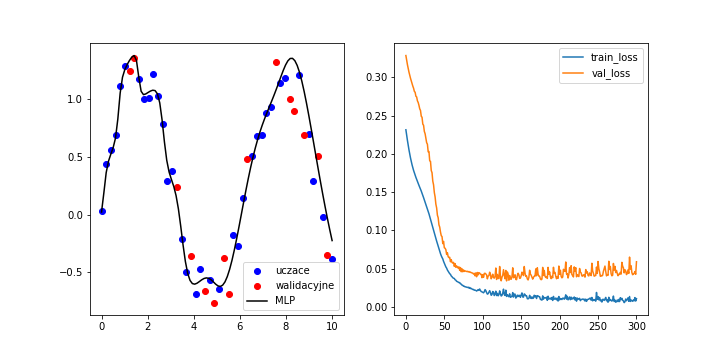

In [21]:
data_xx = np.linspace(0, 10, 100)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

train_loss = []
val_loss = []

model = model2
n_epochs = 300

hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
train_loss.append(model.evaluate(data_x, data_y, verbose=0))
val_loss.append(model.evaluate(val_x, val_y, verbose=0))
pred = model.predict(data_xx)
ax1.plot(data_x, data_y, 'bo', label='uczace')
ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
ax1.plot(data_xx, pred, 'k-', label='MLP')
ax1.legend()
ax2.plot(train_loss, label='train_loss')
ax2.plot(val_loss, label='val_loss')
ax2.legend()
data_str = fig2b64(fig)
rys = IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)

for i in range(n_epochs):
  IPython.display.clear_output(wait=True)
  #time.sleep(0.2)
  hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
  train_loss.append(model.evaluate(data_x, data_y, verbose=0))
  val_loss.append(model.evaluate(val_x, val_y, verbose=0))
  pred = model.predict(data_xx)
  ax1.clear()
  ax2.clear()
  ax1.plot(data_x, data_y, 'bo', label='uczace')
  ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
  ax1.plot(data_xx, pred, 'k-', label='MLP')
  ax1.legend()
  ax2.plot(train_loss, label='train_loss')
  ax2.plot(val_loss, label='val_loss')
  ax2.legend()
  data_str = fig2b64(fig)
  rys = IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)
plt.close(1)

## Kiedy zakończyć uczenie?
Jednym z kluczowych aspektów (poza doborem architektury) jest zdecydowanie kiedy zakończyć uczenie sieci neuronowej. Najpopularniejsza technika polega na obserwacji wartości błedów osiąganych na zbiorze uczącym i zbiorze walidacyjnym. Gdy błąd na zbiorze walidacyjnym przestaje maleć (zazwyczaj zaczyna rosnąć) to znaczy, że sieć zaczyna się przeuczać (traci swoje zdalonośći generalizacyjne) i wtedy należy zakończyć proces uczenia. Taka strategia nazywa się strategią wczesnego zatrzymania (_early stopping_).

## Problemy klasyfikacyjne z wieloma klasami

Baza danych irysów zawiera przykłady z trzech klas. Zwróć uwagę na odpowiednie zakodowanie informacji o etykietach klas dla przykładów za pomocą funkcji `keras.utils.to_categorical`

In [22]:
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

iris_db = datasets.load_iris()
print(dir(iris_db))
print(type(iris_db.data)) #dane jako macierz numpy
print(iris_db.data.shape) #kazdy przyklad w wierszu
print(iris_db.feature_names) #nazwy atrybutow (sygnaly wejsciowe sieci)
print(iris_db.data[:10,:]) #podglad
print(iris_db.target_names) #nazwy trzech klas
print(iris_db.target) #etykiety klas zakodowane numerycznie jako 0, 1, 2

#d: zakodowane etykiety klas w sposob umozliwiajacy uczenie sieci
d = tf.keras.utils.to_categorical(iris_db.target, num_classes=3)
print(type(d))
print(d.shape)
print(d[:5,:])

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
<class 'numpy.ndarray'>
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### Warstwa wyjściowa softmax

W warstwie wyjściowej softmax, każdy neuron realizuje sumę ważoną dochodzących do niego sygnałów wejściowych. Następnie, odpowiedzi wszystkich neuronów wyjściowych są przetwarzane zgodnie ze wzorem

$$P(y=j|\bf{x})=\frac{e^{\bf{x}^{T}\bf{w}_j}}{\sum_{k=1}^{K}{e^{\bf{x}^{T}\bf{w}_k}}}$$

gdzie $K$ to liczba neuronów wyjściowych (liczba klas w problemie klasyfikacyjnym), $w_j$ to wagi j-tego neuronu wyjściowego, $x$ to sygnały wejściowe neuronów z warstwy wyjściowej (odpowiedzi poprzedniej warstwy).

Wartości te mogą być interpretowane jako prawdopodobieństwa przynależności danego przykładu (podanego na wejście sieci) do danej klasy, którą reprezentuje j-ty neuron wyjściowy.

Dla takiej warstwy wyjściowej, funkcją straty używaną w trakcie uczenia jest zazwyczaj `categorical_entropy`, która mierzy podobieństwo dwóch rozkładów prawdopodobieństwa przynależności danych trenujących do klas: rzeczywisty (na podstawie zbioru trenującego) oraz ten realizowany przez sieć.

### Zapis i odczyt modelu do/z pliku

W poniższym przykładzie zwróć uwagę na zapis modelu do pliku i jego ponowne wczytanie.

In [24]:
model = Sequential()
model.add(Dense(30, activation='tanh', input_dim=4))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(iris_db.data, d,
          epochs=200,
          batch_size=10)

score = model.evaluate(iris_db.data, d, batch_size=10)
print('model koncowy:',score)

#sprawdzenie czy dziala zapis/odczyt modelu z pliku
model.save('my_model.h5')
from tensorflow.keras.models import load_model
model2 = load_model('my_model.h5')
score2 = model2.evaluate(iris_db.data, d, batch_size=10)
print('model z pliku:',score2)

Epoch 1/200
15/15 [==============================] - 1s 2ms/step - loss: 0.9266 - accuracy: 0.5800
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7733
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.9200
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.9333
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.9467
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2812 - accuracy: 0.9067
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.9133
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.9333
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.9600
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9733
Epoch 11/

15/15 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9800
Epoch 82/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9667
Epoch 83/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.9600
Epoch 84/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0622 - accuracy: 0.9800
Epoch 85/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9667
Epoch 86/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9667
Epoch 87/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9733
Epoch 88/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9867
Epoch 89/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.9667
Epoch 90/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9667
Epoch 91/200


15/15 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9800
Epoch 162/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9867
Epoch 163/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9800
Epoch 164/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9667
Epoch 165/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9667
Epoch 166/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0987 - accuracy: 0.9600
Epoch 167/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9800
Epoch 168/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0743 - accuracy: 0.9667
Epoch 169/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0902 - accuracy: 0.9667
Epoch 170/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9667
Epoc

## Zadanie 1 (10 pkt., obowiązkowe)
Naucz sieć diagnozować cukrzycę.

- Wykorzytaj dane z pliku `pima-indians-diabetes.data.csv`. Dane są również dostępne w `sklearn`. Zaimportuje je jako `diab_db=datasets.load_diabetes()`

- Podziel dostępne dane losowo na dane uczące i testowe (walidacyjne) w proporcji 70% / 30%. Podział danych jest wykonywany raz i jest używany niezmieniony w dalszych obliczeniach dla wszystkich sieci.

- Dobierz jak najlepsze parametry uczenia oraz architektury sieci z jedną oraz z dwiema warstwami ukrytymi (po jednej na każdy rodzaj). Jakość działania sieci oceniamy na podstawie jej wyników na danych testowych. Postaraj się w odpowiednim momencie zatrzymać proces uczenia.

- Czy sieć z dwiema warstwami ukrytymi działa lepiej niż sieć z jedną warstwą ukrytą? Porównania i wnioski przedstaw na podstawie uśrednionych wyników dziesięciu sieci każdego rodzaju (tzn. najpierw ustal architekturę sieci, następnie przeprowadź 10 procesów trenownia, startując za każdym razem z losowych początkowych wag). 

- W dostarczonym kodzie umieść proces uczenia i testowania wybranych architektur sieci.

__Uwaga:__ Przy uczeniu większych modeli warto wykonywać obliczenia z wykorzystaniem karty graficznej. Aby uruchomić notatnik z wykorzystaniem GPU należy wejść do Edit->Notebook settings i zmienić Hardware accelerator na GPU.


TWÓJ KOD TUTAJ:

In [27]:
import sys

load_dataset = np.loadtxt("pima-indians-diabetes.data.csv", delimiter = ',')
X = load_dataset[:, 0:8]
Y = load_dataset[:, 8]
data_x = X[:309]
data_y = Y[:309]
val_x = X[309:]
val_y = Y[309:]



model1 = Sequential()
model1.add(Dense(30, input_dim=8, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
model1.add(Dense(1, use_bias=True, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
rms = tf.keras.optimizers.RMSprop(lr=0.001)
model1.compile(loss='mse', optimizer=rms, metrics=['accuracy'])
model1.fit(data_x, data_y, epochs=150, verbose=1, batch_size=10, validation_data=(val_x, val_y))
score = model1.evaluate(val_x, val_y, batch_size=10)
print('\n  [model1] model końcowy: {}'.format(score))


model2 = Sequential()
model2.add(Dense(12, input_dim=8, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
model2.add(Dense(8, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
model2.add(Dense(1, use_bias=True, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
rms = tf.keras.optimizers.RMSprop(lr=0.001)
model2.compile(loss='mse', optimizer=rms, metrics=['accuracy'])
model2.fit(data_x, data_y, epochs=150, verbose=1, batch_size=10, validation_data=(val_x, val_y))
score = model2.evaluate(val_x, val_y, batch_size=10)
print('\n  [model2] model końcowy: {}'.format(score))


scale = np.zeros(shape=(10,2,2))
for i in range(0, 10):
    np.random.seed(i)
    
    model1.fit(data_x, data_y, epochs=150, verbose=0, batch_size=10, validation_data=(val_x, val_y))
    scale[i, 0] = model1.evaluate(val_x, val_y, batch_size=10)
    
    model2.fit(data_x, data_y, epochs=150, verbose=0, batch_size=10, validation_data=(val_x, val_y))
    scale[i, 1] = model2.evaluate(val_x, val_y, batch_size=10)



print('\n [JEDNA WARSTWY] LOSS:       {}'.format(scale[:, 0, 0].mean()))
print(' [JEDNA WARSTWY] ACCURACY:   {}'.format(scale[:, 0, 1].mean()))
print('---------------------------')
print(' [DWIE WARSTWY] LOSS:       {}'.format(scale[:, 1, 0].mean()))
print(' [DWIE WARSTWY] ACCURACY:   {}'.format(scale[:, 1, 1].mean()))

Epoch 1/150
31/31 [==============================] - 1s 11ms/step - loss: 0.2374 - accuracy: 0.5858 - val_loss: 0.2206 - val_accuracy: 0.6754
Epoch 2/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.6149 - val_loss: 0.2215 - val_accuracy: 0.6885
Epoch 3/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2257 - accuracy: 0.6246 - val_loss: 0.2135 - val_accuracy: 0.7037
Epoch 4/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2226 - accuracy: 0.6117 - val_loss: 0.2220 - val_accuracy: 0.6405
Epoch 5/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2188 - accuracy: 0.6278 - val_loss: 0.2125 - val_accuracy: 0.6688
Epoch 6/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2178 - accuracy: 0.6375 - val_loss: 0.2052 - val_accuracy: 0.6950
Epoch 7/150
31/31 [==============================] - 0s 7ms/step - loss: 0.2164 - accuracy: 0.6699 - val_loss: 0.2010 - val_accuracy: 0.6841
Epoch 8/150


Epoch 59/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1865 - accuracy: 0.7055 - val_loss: 0.2283 - val_accuracy: 0.5969
Epoch 60/150
31/31 [==============================] - 0s 4ms/step - loss: 0.1875 - accuracy: 0.7152 - val_loss: 0.1944 - val_accuracy: 0.7015
Epoch 61/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1887 - accuracy: 0.7282 - val_loss: 0.1911 - val_accuracy: 0.7255
Epoch 62/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1893 - accuracy: 0.7120 - val_loss: 0.1964 - val_accuracy: 0.7037
Epoch 63/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1870 - accuracy: 0.7217 - val_loss: 0.1897 - val_accuracy: 0.7124
Epoch 64/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1875 - accuracy: 0.7184 - val_loss: 0.1906 - val_accuracy: 0.7102
Epoch 65/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1850 - accuracy: 0.7217 - val_loss: 0.1921 - val_accuracy: 0.7102
Epoch 

31/31 [==============================] - 0s 5ms/step - loss: 0.1733 - accuracy: 0.7411 - val_loss: 0.1964 - val_accuracy: 0.6972
Epoch 117/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1759 - accuracy: 0.7314 - val_loss: 0.1891 - val_accuracy: 0.7102
Epoch 118/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1665 - accuracy: 0.7670 - val_loss: 0.1883 - val_accuracy: 0.7190
Epoch 119/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1699 - accuracy: 0.7443 - val_loss: 0.1911 - val_accuracy: 0.7146
Epoch 120/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1695 - accuracy: 0.7411 - val_loss: 0.1908 - val_accuracy: 0.7124
Epoch 121/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1752 - accuracy: 0.7314 - val_loss: 0.1899 - val_accuracy: 0.7102
Epoch 122/150
31/31 [==============================] - 0s 6ms/step - loss: 0.1749 - accuracy: 0.7249 - val_loss: 0.1890 - val_accuracy: 0.7211
Epoch 123/150

31/31 [==============================] - 0s 5ms/step - loss: 0.2080 - accuracy: 0.6699 - val_loss: 0.1998 - val_accuracy: 0.7015
Epoch 23/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2079 - accuracy: 0.6602 - val_loss: 0.1985 - val_accuracy: 0.7146
Epoch 24/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2061 - accuracy: 0.6731 - val_loss: 0.2085 - val_accuracy: 0.6863
Epoch 25/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2042 - accuracy: 0.6893 - val_loss: 0.1987 - val_accuracy: 0.7081
Epoch 26/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2055 - accuracy: 0.6634 - val_loss: 0.1969 - val_accuracy: 0.7037
Epoch 27/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2029 - accuracy: 0.6796 - val_loss: 0.1956 - val_accuracy: 0.7146
Epoch 28/150
31/31 [==============================] - 0s 5ms/step - loss: 0.2031 - accuracy: 0.6796 - val_loss: 0.1938 - val_accuracy: 0.7168
Epoch 29/150
31/31 

Epoch 80/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1858 - accuracy: 0.7411 - val_loss: 0.1967 - val_accuracy: 0.7102
Epoch 81/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1949 - accuracy: 0.6926 - val_loss: 0.1923 - val_accuracy: 0.7124
Epoch 82/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1876 - accuracy: 0.6990 - val_loss: 0.1989 - val_accuracy: 0.6972
Epoch 83/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1889 - accuracy: 0.7443 - val_loss: 0.1897 - val_accuracy: 0.7190
Epoch 84/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1866 - accuracy: 0.7282 - val_loss: 0.2148 - val_accuracy: 0.6427
Epoch 85/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1889 - accuracy: 0.7087 - val_loss: 0.1897 - val_accuracy: 0.7081
Epoch 86/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1882 - accuracy: 0.7120 - val_loss: 0.1884 - val_accuracy: 0.7233
Epoch 

31/31 [==============================] - 0s 5ms/step - loss: 0.1788 - accuracy: 0.7379 - val_loss: 0.1935 - val_accuracy: 0.7168
Epoch 138/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1748 - accuracy: 0.7411 - val_loss: 0.1895 - val_accuracy: 0.7190
Epoch 139/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1823 - accuracy: 0.7087 - val_loss: 0.1887 - val_accuracy: 0.7146
Epoch 140/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1772 - accuracy: 0.7508 - val_loss: 0.1973 - val_accuracy: 0.6972
Epoch 141/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1800 - accuracy: 0.7443 - val_loss: 0.1885 - val_accuracy: 0.7277
Epoch 142/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1764 - accuracy: 0.7411 - val_loss: 0.1935 - val_accuracy: 0.7255
Epoch 143/150
31/31 [==============================] - 0s 5ms/step - loss: 0.1791 - accuracy: 0.7508 - val_loss: 0.2011 - val_accuracy: 0.6950
Epoch 144/150

TWOJE KOMENTARZE I WNIOSKI

&copy; Katedra Informatyki, Politechnika Krakowska